In [60]:
import pandas as pd

df = pd.read_csv(r"C:\Users\USER\Chameleon AI-IoT\MOP-Code\artificial-intelligence\CyberSecurity\datasets\HITECH_Cleaned.csv")

# Fill missing descriptions
df['web_description'] = df['web_description'].fillna("No description provided")
df.head()


,name_of_covered_entity,state,covered_entity_type,individuals_affected,breach_submission_date,type_of_breach,location_of_breached_information,business_associate_present,web_description,breach_year,breach_month,severity_level,type_of_breach_encoded,location_of_breached_information_encoded,covered_entity_type_encoded
0,William F Rinehart DMD PA,SC,Healthcare Provider,25000.0,2025-03-24,Hacking/IT Incident,Network Server,No,No description provided,2025,3,High,0,83,3
1,Meigs County Emergency Medical Services,OH,Healthcare Provider,5802.0,2025-03-20,Hacking/IT Incident,Email,No,No description provided,2025,3,Moderate,0,66,3
2,Presbyterian Health Plan,NM,Health Plan,7100.0,2025-03-18,Hacking/IT Incident,Email,No,No description provided,2025,3,Moderate,0,66,1
3,Baylor Scott & White Texas Spine & Joint Hospital,TX,Healthcare Provider,1640.0,2025-03-14,Hacking/IT Incident,Email,No,No description provided,2025,3,Moderate,0,66,3
4,Lake Psychological Services,PA,Healthcare Provider,987.0,2025-03-14,Hacking/IT Incident,Network Server,No,No description provided,2025,3,Low,0,83,3


In [66]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords set and lemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean and lemmatize text

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['web_description'].apply(preprocess_text)
df['clean_text'].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    description provided
1    description provided
2    description provided
3    description provided
4    description provided
Name: clean_text, dtype: object

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])


In [72]:
from sklearn.decomposition import LatentDirichletAllocation

# Fit an LDA model to discover 5 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)


LatentDirichletAllocation(n_components=5, random_state=42)

In [76]:
#  Print the top 10 words for each topic
feature_names = tfidf.get_feature_names_out()
n_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_indices]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}\n")

Topic 1: description provided posted mistakenly designed division web balance working receive

Topic 2: ce breach ba ocr information investigation individual server access notification

Topic 3: ce information phi individual affected health security ephi notified ba

Topic 4: ce breach individual information ocr patient notification phi policy laptop

Topic 5: blue hipaa anthem review rule plan compliance shield settlement risk



In [46]:
!pip install wordcloud

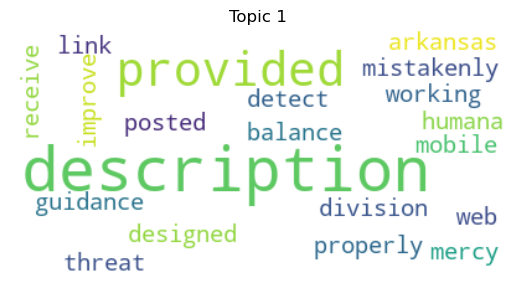

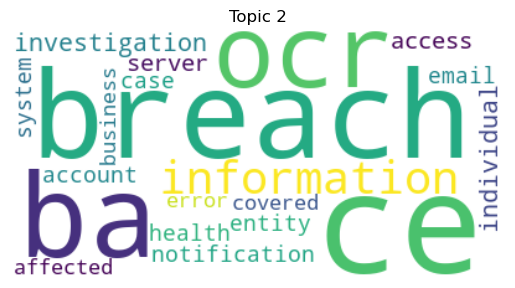

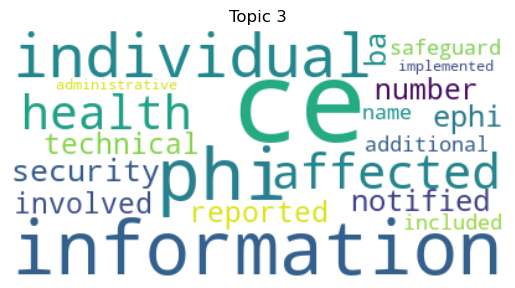

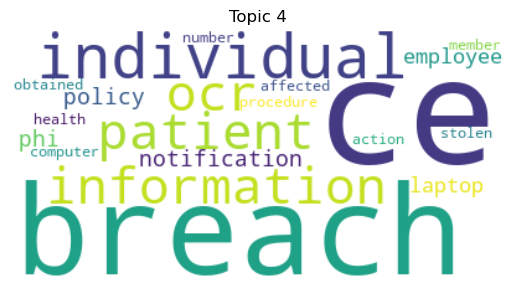

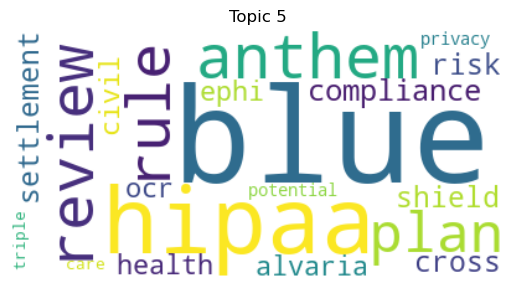

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_idx, topic in enumerate(lda.components_):
    plt.figure()
    word_freq = {tfidf.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-21:-1]}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_idx + 1}")
    plt.show()


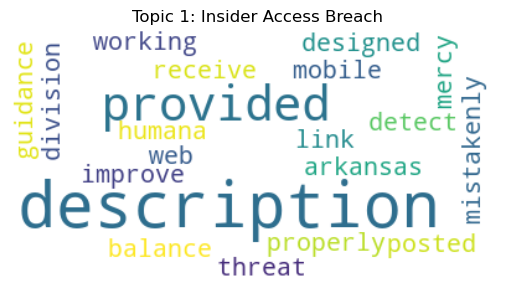

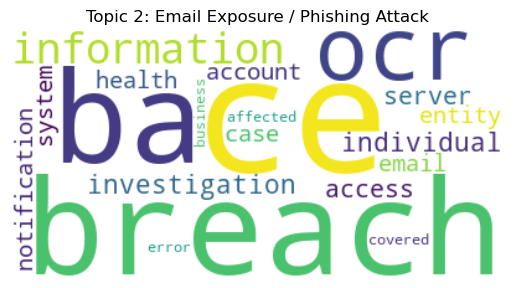

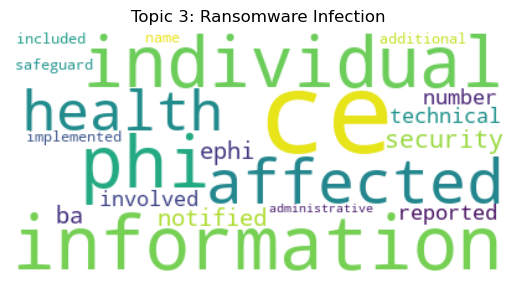

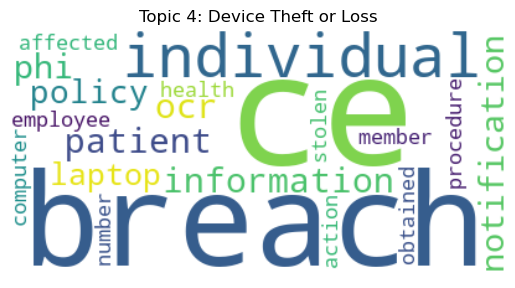

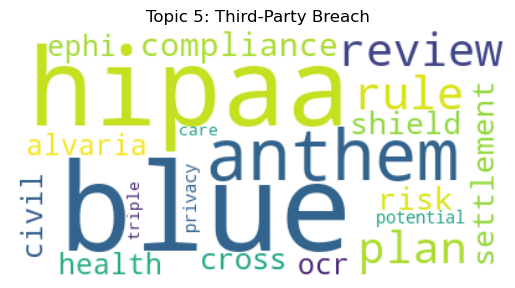

In [48]:
topic_labels = [
    "Insider Access Breach",
    "Email Exposure / Phishing Attack",
    "Ransomware Infection",
    "Device Theft or Loss",
    "Third-Party Breach"
]

for topic_idx, topic in enumerate(lda.components_):
    plt.figure()
    word_freq = {tfidf.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-21:-1]}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_idx + 1}: {topic_labels[topic_idx]}")
    plt.show()


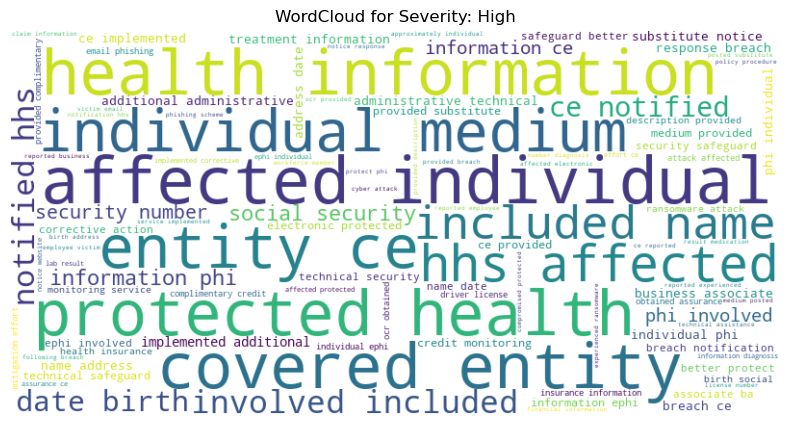

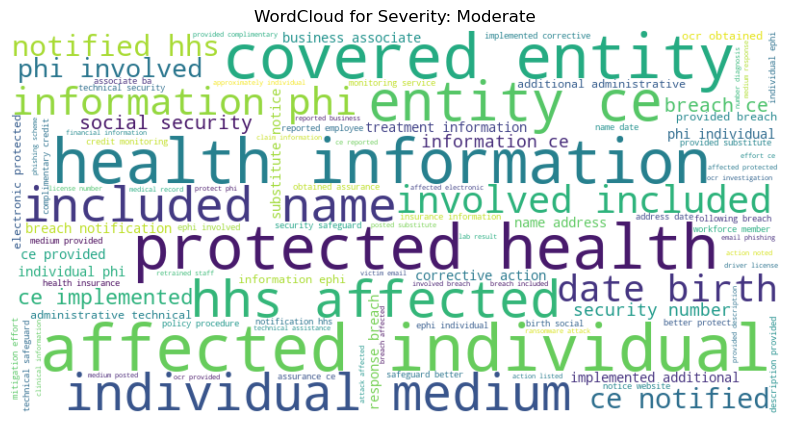

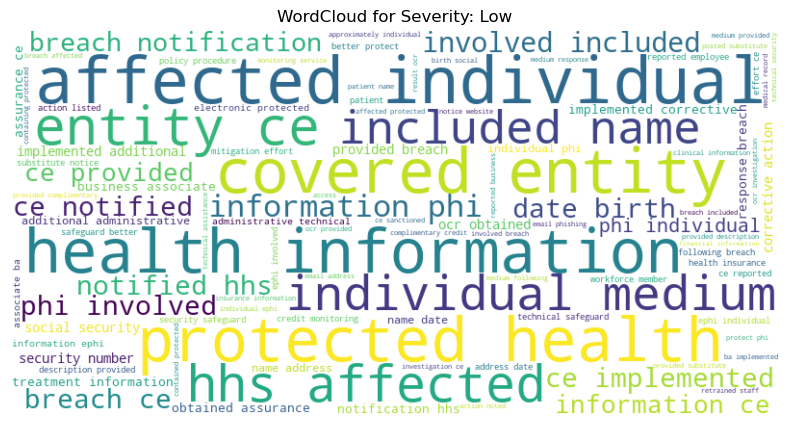

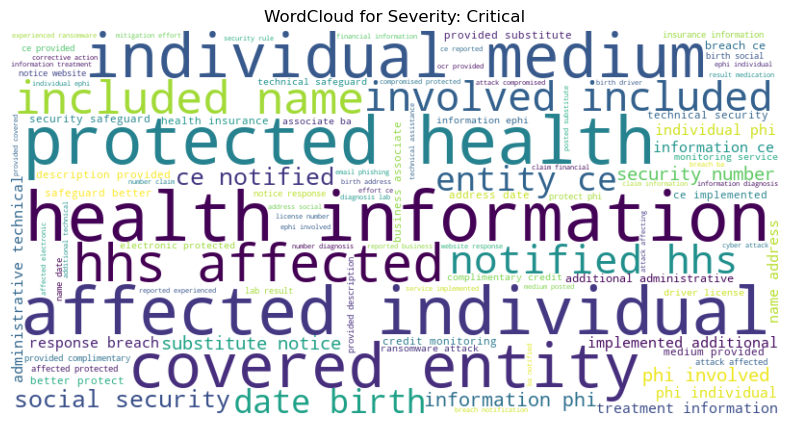

In [78]:
# Generate separate WordClouds by severity_level
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loop through each severity bucket
for level in df['severity_level'].unique():
    # Concatenate all cleaned descriptions for this level
    text = " ".join(df.loc[df['severity_level'] == level, 'clean_text'])
    
    # Build the word cloud (you can tweak max_words, width/height, etc.)
    wc = WordCloud(
        background_color='white',
        max_words=100,
        width=800,
        height=400
    ).generate(text)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Severity: {level}")
    plt.show()
